# 2019 Regression Deep Dive

A regression on only 2019 Data, We wanted to take a deeper look at 2019 and see what we could find.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
freedom_data = pd.read_excel("data/index2019_data_expanded.xls")

In [44]:
freedom_data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,69.6,2.505,2.9,1957.58,8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,36,3.900,2.5,12506.6,13.9,2.0,1119.1,71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,632.9,2.000,3.1,15237.2,10,5.6,1203.0,25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,190.3,0.700,2.9,6752.58,8.2,31.7,-2254.5,65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,920.2,2.900,0.7,20875.8,8.7,25.7,11857.0,52.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,Venezuela,31.4,380.7,-14.000,-7.8,12113.5,7.7,1087.5,-68.0,34.9
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,Vietnam,93.6,647.4,6.800,6.2,6913.13,2.1,3.5,14100.0,58.2
183,181,Yemen,Yemen,Middle East and North Africa,NaN,NaN,NaN,19.6,22.2,20.3,...,Yemen,30,38.6,-13.800,-16.1,1287.48,14,4.9,-269.9,141.0
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,Zambia,17.2,68.9,3.600,4.0,3996.14,7.8,6.6,1091.2,62.2


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
freedom_data = freedom_data.dropna()


In [47]:
freedom_data[80:100]

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
83,82,Japan,Japan,Asia-Pacific,30.0,8.0,72.1,84.1,68.5,78.0,...,Japan,126.7,5428.8,1.700,1.3,42831.5,2.8,0.5,10429.8,236.4
84,83,Jordan,Jordan,Middle East and North Africa,53.0,4.0,66.5,58.4,52.6,50.3,...,Jordan,7.1,89.1,2.300,2.5,12494.4,14.9,3.3,1664.8,95.6
85,84,Kazakhstan,Kazakhstan,Asia-Pacific,59.0,12.0,65.4,59.3,56.1,40.3,...,Kazakhstan,18.2,477.6,4.000,3.3,26252.1,4.9,7.4,4633.7,21.2
86,85,Kenya,Kenya,Sub-Saharan Africa,130.0,22.0,55.1,53.8,46.9,32.1,...,Kenya,46.7,163.1,4.800,5.5,3491.12,11.5,8.0,671.7,55.6
89,88,"Korea, South",SouthKorea,Asia-Pacific,29.0,7.0,72.3,79.3,57.5,50.5,...,"Korea, South",51.5,2029,3.085,3.0,39433.8,3.7,1.9,17052.8,39.8
91,89,Kuwait,Kuwait,Middle East and North Africa,90.0,8.0,60.8,52.9,43.3,35.3,...,Kuwait,4.4,291.5,-2.500,-0.1,66162.9,2.1,1.5,300.5,20.6
92,90,Kyrgyz Republic,KyrgyzRepublic,Asia-Pacific,79.0,17.0,62.3,49.9,27.9,27.2,...,Kyrgyz Republic,6.3,23,4.490,5.4,3667.45,7.3,3.2,93.8,59.1
93,91,Laos,Laos,Asia-Pacific,110.0,24.0,57.4,38.8,42.5,33.5,...,Lao P.D.R.,6.7,49.2,6.830,7.4,7365.89,0.7,0.8,813.0,62.8
94,92,Latvia,Latvia,Europe,35.0,18.0,70.4,67.3,48.4,35.5,...,Latvia,2,53.9,4.500,2.8,27644.1,8.7,2.9,721.2,34.8
95,93,Lebanon,Lebanon,Middle East and North Africa,154.0,12.0,51.1,39.5,26.6,18.2,...,Lebanon,4.5,87.7,1.200,1.5,19439.1,6.6,4.5,2628.0,152.8


In [48]:
freedom_data.columns[29]

'GDP per Capita (PPP)'

In [49]:
freedom_data = freedom_data.drop(freedom_data.columns[[1,2,3,24,25,26]], axis=1)

In [70]:
X = freedom_data.drop(freedom_data.columns[[23]], axis=1)
#y = freedom_data.iloc[29]
y = freedom_data['GDP per Capita (PPP)'].tolist()
z = np.log(y)
z

array([ 7.5794643 ,  9.43401578,  9.63149509,  8.81767993,  9.94634396,
        9.15439839, 10.82643031, 10.81714903,  9.76951949, 10.34622821,
       10.78941783,  8.34540556,  9.83432556,  9.84854815, 10.74834823,
        9.02695105,  7.73061407,  9.07612646,  8.92890409,  9.45122482,
        9.78852946,  9.655189  , 11.26697441,  9.98445168,  7.54404106,
        8.73935706,  6.60018338,  8.29715232,  8.20528946, 10.78446712,
        8.84563614,  6.5175531 ,  7.75942215, 10.10794194,  9.72078212,
        9.58088962,  7.37040695,  6.67196965,  8.8011413 ,  9.73371888,
        8.26434015, 10.1033027 , 10.51929354, 10.47763721, 10.81743614,
        8.17735289,  9.73767792,  9.34855503,  9.44705226,  9.09920879,
       10.49175688,  7.36601522, 10.36563289,  9.19871101,  7.6782338 ,
        9.18781047, 10.69947558, 10.68649303,  9.86547567,  7.44599566,
        9.28238658, 10.82824534,  8.46157265, 10.23052362,  9.00513988,
        7.62099426,  7.52011531,  9.0071465 ,  7.50364789,  8.62

In [66]:
model = LinearRegression(normalize=True)
model.fit(X,y)
score = lm.score(X,y)
print(f'R^2 Score: {score}')

R^2 Score: 0.6970790983202277


## Adjusted R2

Because of the large number of variables, we needed to run an adjusted R-squared to make sure that our variables are actually explaining the model.

In [77]:
def r2_adj(X, y, norm=True, y_int=True):
    adj_model = LinearRegression(normalize=norm, fit_intercept=y_int)
    adj_model.fit(X, y)
    r_sq = adj_model.score(X, y)
    n, p = X.shape
    adj_r_sq = r_sq - (1 - r_sq) * p / (n - p - 1)
    return r_sq, adj_r_sq

In [74]:
r2_adj(X,y)

(0.6970790983202277, 0.6406731373177874)

### R2 results
It appears that our variables are fairly good. If we had variables that didn't explain the model, adjusted R-squared would have been much lower than the r-squared value.

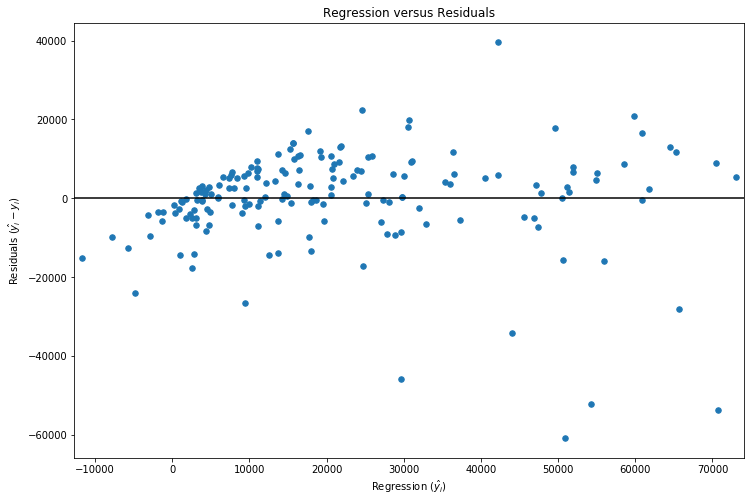

In [37]:
y_hat = lm.predict(X)
res = y_hat - y


xlim = [y_hat.min()-1000, y_hat.max()+1000]
plt.figure(figsize=(12,8))
plt.scatter(y_hat, res, s=30)
plt.xlabel('Regression ($\hat{y_i}$)')
plt.ylabel('Residuals ($\hat{y_i} - y_i$)')
plt.title('Regression versus Residuals')
plt.hlines(0, xlim[0], xlim[1])
plt.xlim(xlim)
plt.show()

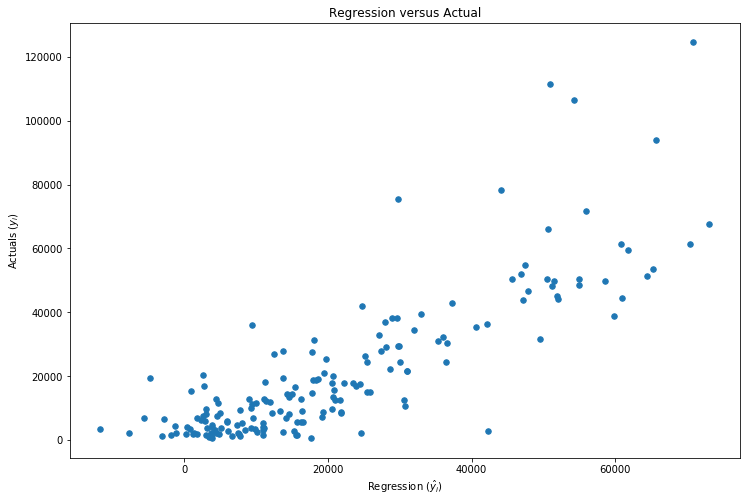

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(y_hat, y, s=30)
plt.xlabel('Regression ($\hat{y_i}$)')
plt.ylabel('Actuals ($y_i$)')
plt.title('Regression versus Actual')
plt.show()

In [79]:
y_log = np.log(y)
lm_log = LinearRegression(normalize=True)
lm_log.fit(X,y_log)
r2_adj(X,y_log)

(0.7360755403032176, 0.6869309857389893)

In [87]:
y_hat_log = lm_log.predict(X)
res2 = y_hat_log - y_log
# Standardize residuals
res2_z = (res2 - res2.mean()) /  res2.std()

q75, q25 = np.percentile(res2, [75 ,25])
iqr = q75 - q25
out_right = res2[res2 >= (1.5 * iqr + q75)]
out_left = res2[res2 <= q25 - 1.5 * iqr]


In [108]:
out_right= pd.Series([out_right])
out_left= pd.Series([out_left])
array = pd.concat([s1,s2], ignore_index=True)
array

0             [1.4250639470072874, 1.8971684161137699]
1    [-1.5707968164420194, -1.7467400500812609, -1....
dtype: object

In [110]:
y_series = pd.Series(y_log)
y_series

0      7.579464
1      9.434016
2      9.631495
3      8.817680
4      9.946344
         ...   
168    7.915494
169    9.402079
170    8.841178
171    8.293084
172    7.733092
Length: 173, dtype: float64

In [112]:
outliers = pd.concat([out_right, out_left])

X2 = X.drop(outliers.index, axis=0)
y2 = y_series.drop(outliers.index, axis=0)
model.fit(X2,y2)
r2_adj(X2, y2)


(0.7329569930975831, 0.68288642930338)

In [128]:
x_agg = freedom_data['2019 Score'].drop(outliers.index, axis=0).values.reshape(-1,1)
#y2 = freedom_data['GDP per Capita (PPP)']
plot = LinearRegression(normalize=True, fit_intercept=True)
x_agg

array([[66.5],
       [46.2],
       [50.6],
       [52.2],
       [67.7],
       [80.9],
       [72. ],
       [65.4],
       [62.9],
       [66.4],
       [55.6],
       [64.7],
       [57.9],
       [67.3],
       [55.4],
       [55.3],
       [62.9],
       [42.3],
       [61.9],
       [69.5],
       [51.9],
       [65.1],
       [69. ],
       [59.4],
       [53.6],
       [48.9],
       [57.8],
       [52.4],
       [77.7],
       [63.1],
       [49.1],
       [49.9],
       [75.4],
       [58.4],
       [67.3],
       [55.4],
       [50.3],
       [39.7],
       [65.3],
       [62.4],
       [61.4],
       [68.1],
       [73.7],
       [76.7],
       [47.1],
       [61. ],
       [46.9],
       [52.5],
       [61.8],
       [41. ],
       [38.9],
       [76.6],
       [54.7],
       [53.6],
       [62.2],
       [74.9],
       [63.8],
       [56.3],
       [52.4],
       [75.9],
       [73.5],
       [57.5],
       [57.7],
       [62.6],
       [55.7],
       [54. ],
       [56

In [141]:
plot.fit(x_agg,y2)
y_hat_agg = plot.predict(x_agg)
x_hat_agg = np.linspace(25,100,100).reshape(-1,1)
y_hat_agg_reg = plot.predict(x_hat_agg)
res_ = y_hat_agg - y2


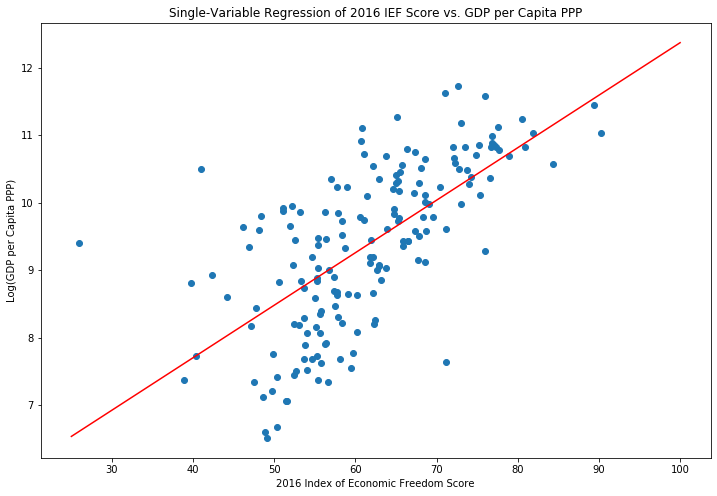

In [142]:
plt.figure(figsize=(12,8))
plt.scatter(x_agg,y2)
plt.plot(x_hat_agg, y_hat_agg_reg, c='r')
plt.xlabel("2016 Index of Economic Freedom Score")
plt.ylabel("Log(GDP per Capita PPP)")
plt.title("Single-Variable Regression of 2016 IEF Score vs. GDP per Capita PPP")
plt.show()